In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pickle

In [2]:
CATEGORIES = ["Chinese Temple", "Hindu Temple", "Mosque"]

In [3]:
DATADIR = os.path.abspath(os.getcwd())
DATADIR = os.path.join(DATADIR, "Dataset")

First, let's see one example from each class

In [4]:
class_examples = []

for category in CATEGORIES:
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

    class_examples.append([img_array])
    break

plt.figure(figsize=(15,15))
for i in range(len(class_examples)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(class_examples[i][0])
  plt.xlabel(CATEGORIES[i])
plt.show()

Now, let's create our dataset

In [5]:
IMG_SIZE = 100

def create_dataset():
    dataset = []
    for category in CATEGORIES:

        path = os.path.join(DATADIR,category)  # create path to each subfolder(class name) in the dataset folder
        class_num = CATEGORIES.index(category)  # get the classification index from 0 to 9

        for img in os.listdir(path):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path, img))
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                dataset.append([new_array, class_num])  # add this to our training_data
            except Exception as e: 
                print("error")
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))
    return np.array(dataset)

In [6]:
dataset = create_dataset()
print("Dataset shape:",np.array(dataset).shape)

Dataset shape: (95, 2)


In [7]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(top=9.0, bottom=3.9)
for i in range(95):
  plt.subplot(24,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(dataset[i][0])
  plt.xlabel(CATEGORIES[dataset[i][1]]+" " +str(i+1))
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
import random

train_set, test_set = train_test_split(dataset, test_size=0.2, random_state = 2)

In [9]:
print("Train set shape:", train_set.shape)
print("Test set shape:", test_set.shape)

Train set shape: (76, 2)
Test set shape: (19, 2)


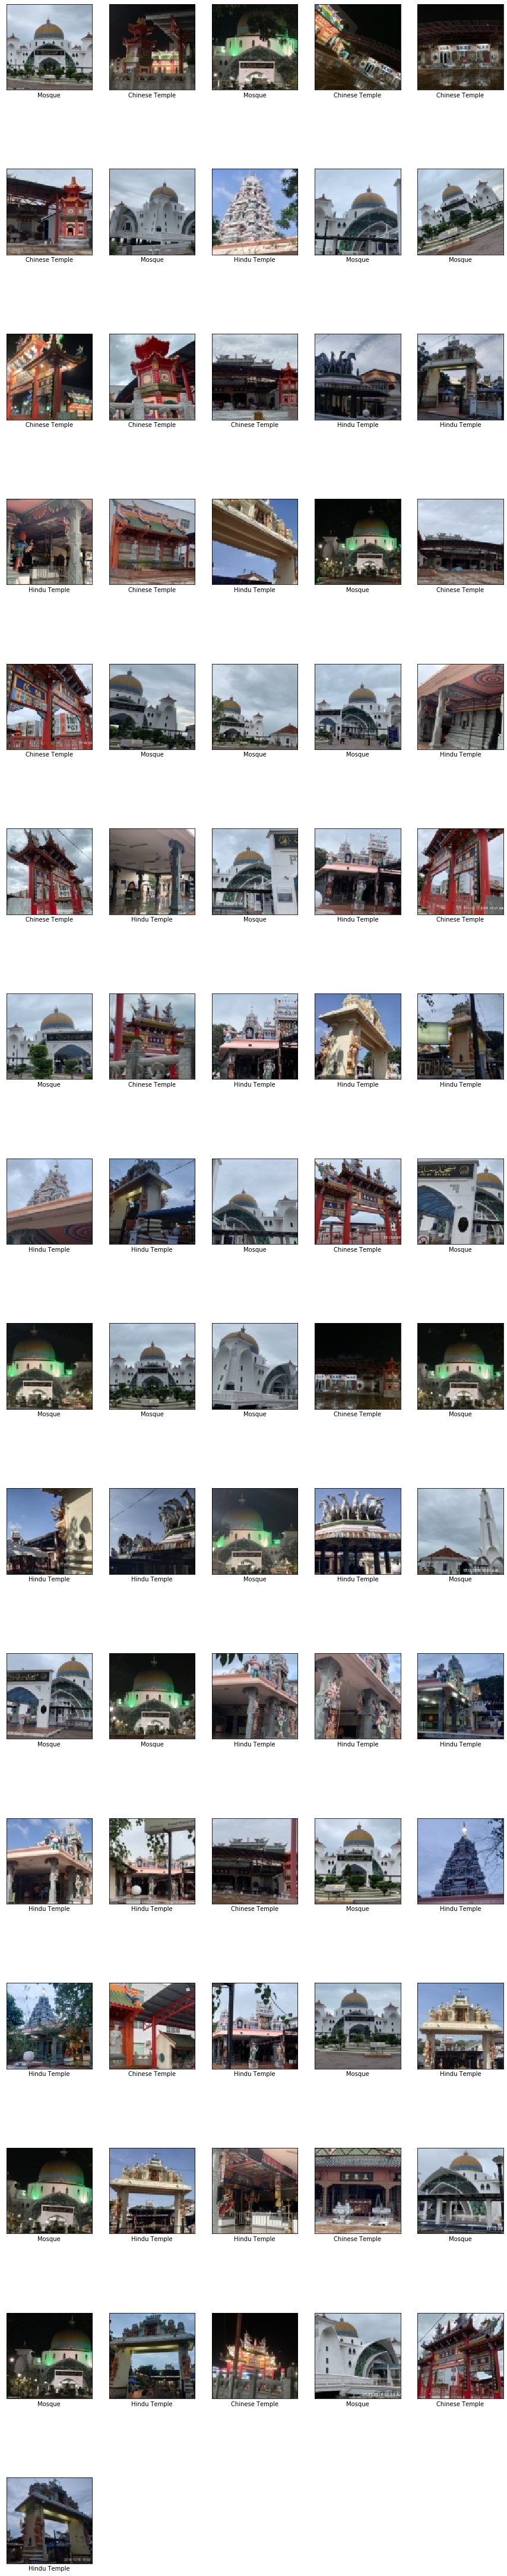

In [10]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(top=9.0, bottom=3.9)

for i in range(76):
  plt.subplot(20,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_set[i][0])
  plt.xlabel(CATEGORIES[train_set[i][1]])
plt.show()

Now, let's export the train set and test set to external files(pickle file). Next time, we do not need to load the images and recreate the dataset again. <br>We just have to import the pickle file

In [11]:
pickle_out = open("train_set.pickle","wb")
pickle.dump(train_set, pickle_out)
pickle_out.close()

pickle_out = open("test_set.pickle","wb")
pickle.dump(test_set, pickle_out)
pickle_out.close()